<a href="https://colab.research.google.com/github/Asuna-sama-1/Horror_movies/blob/main/horror_movie_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libararies 

In [ ]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin

## Load data

In [ ]:
movies = pd.read_csv("rotten_tomatoes_movies.csv")
movies

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17707,m/zoot_suit,Zoot Suit,Mexican-American gangster Henry Reyna (Daniel ...,NaN,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,...,MCA Universal Home Video,Rotten,56.0,9.0,Upright,74.0,1195.0,2,5,4
17708,m/zootopia,Zootopia,From the largest elephant to the smallest shre...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","J.K. Simmons, Kristen Bell, Octavia Spencer, A...",2016-03-04,...,Walt Disney Animation Studios,Certified-Fresh,98.0,291.0,Upright,92.0,101511.0,50,285,7
17709,m/zorba_the_greek,Zorba the Greek,Traveling to inspect an abandoned mine his fat...,NaN,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1964-12-17,...,Fox,Fresh,80.0,10.0,Upright,86.0,7146.0,0,8,2
17710,m/zulu,Zulu,"In 1879, the Zulu nation hands colonial Britis...",Zulu patiently establishes a cast of colorful ...,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,...,Paramount Pictures,Fresh,96.0,23.0,Upright,91.0,30193.0,6,22,1


In [ ]:
data = pd.read_csv("rotten_tomatoes_critic_reviews.csv")
data

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...
...,...,...,...,...,...,...,...,...
176295,m/better_luck_tomorrow,J. C. Farrow,False,Citysearch,Fresh,8/10,2003-04-10,"Like Go meets Boyz N the Hood, this good-teen-..."
176296,m/better_luck_tomorrow,Patrick Z. McGavin,True,Chicago Tribune,Rotten,2/4,2003-04-10,Though Better Luck Tomorrow is the work of an ...
176297,m/better_luck_tomorrow,Jeffrey Chen,False,Window to the Movies,Fresh,8/10,2003-04-10,Being simultaneously proud of and embarrassed ...
176298,m/better_luck_tomorrow,Nick Schager,False,Filmcritic.com,Fresh,4/5,2003-04-11,Lin's assured and electric tale of good kids g...


In [ ]:
data.isnull().sum()

rotten_tomatoes_link        0
critic_name              3918
top_critic                  0
publisher_name              0
review_type                 0
review_score            46861
review_date                 0
review_content          14308
dtype: int64

## Useful functions

In [ ]:
def value_cnt_norm_cal(df,feature):
    ftr_value_cnt = df[feature].value_counts()
    ftr_value_cnt_norm = df[feature].value_counts(normalize=True) * 100
    ftr_value_cnt_concat = pd.concat([ftr_value_cnt, ftr_value_cnt_norm], axis=1)
    ftr_value_cnt_concat.columns = ['Count', 'Frequency (%)']
    return ftr_value_cnt_concat

In [ ]:
def create_bar_plot(df,feature):
  fig, ax = plt.subplots(figsize=(5,8))
  sns.barplot(x=value_cnt_norm_cal(df,feature).index,y=value_cnt_norm_cal(df,feature).values[:,0])
  plt.xlabel('{}'.format(feature))
  plt.ylabel('Count')
  plt.title('{} count'.format(feature))
  return plt.show()

In [ ]:
def create_box_plot(df,cat_feature,num_feature):
  print((df.groupby(cat_feature)[num_feature].mean().sort_values()))
  fig, ax = plt.subplots(figsize=(25,8))
  sns.boxplot(x=df[cat_feature],y=df[num_feature])
  plt.title('{} grouped by {}'.format(num_feature,cat_feature))
  return plt.show()

In [ ]:
def top_n_bar_plot(df,feature,n):
  fig, ax = plt.subplots(figsize=(20,4))
  sns.barplot(x=value_cnt_norm_cal(df,feature).index[:n],y=value_cnt_norm_cal(df,feature).values[:n,0])
  ax.set_xticklabels(labels=value_cnt_norm_cal(df,feature).index,rotation=45,ha='right')
  plt.xlabel('{}'.format(feature))
  plt.ylabel('Count')
  plt.title('Top {} {} count'.format(n,feature))
  return plt.show()

In [ ]:
def print_info(df,feature):
   print('Description:\n{}'.format(df[feature].describe()))
   print('*'*50)
   print('Object type:\n{}'.format(df[feature].dtype))
   print('*'*50)
   value_cnt = value_cnt_norm_cal(df,feature)
   print('Value count:\n{}'.format(value_cnt))

In [ ]:
def create_hist_plot(df, feature, num_bin):
  if feature in ['original_release_date','streaming_release_date']:
    # convert to datetime
    df[feature] = pd.to_datetime(df[feature])
    fig, ax = plt.subplots(figsize=(15,8))
    sns.histplot(df[feature],bins=num_bin,kde=True)
    plt.title('{} distribution'.format(feature))
    return plt.show()
  else:
    fig, ax = plt.subplots(figsize=(15,8))
    sns.histplot(df[feature],bins=num_bin,kde=True)
    plt.title('{} distribution'.format(feature))
    return plt.show()

## genre vs rating

In [ ]:
# generate new feature main_genre
movies['main_genre'] = movies['genres'].str.split(',').str[0]
movies['main_genre']

0               Action & Adventure
1                           Comedy
2                           Comedy
3                         Classics
4               Action & Adventure
                   ...            
16272    Art House & International
16273                        Drama
16274    Art House & International
16275                        Drama
16276                          NaN
Name: main_genre, Length: 16277, dtype: object

In [ ]:
value_cnt_norm_cal(movies,'main_genre')

,Count,Frequency (%)
Drama,3472,21.355640
Comedy,3404,20.937385
Action & Adventure,3275,20.143929
Art House & International,1852,11.391315
Documentary,1568,9.644483
Classics,1048,6.446057
Horror,879,5.406569
Animation,342,2.103580
Mystery & Suspense,268,1.648419
Kids & Family,44,0.270636


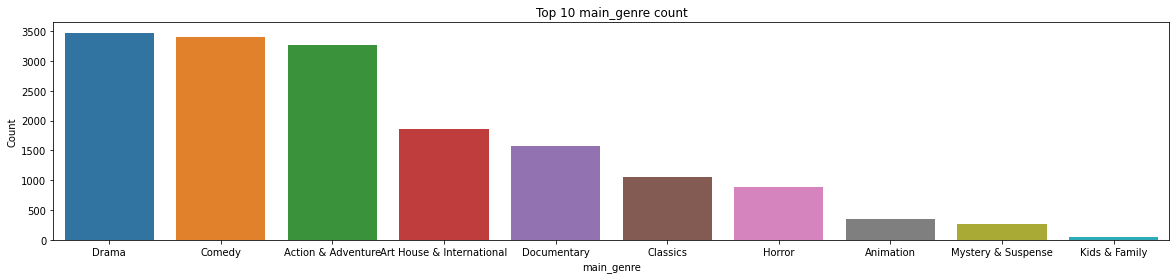

In [ ]:
top_n_bar_plot(movies,'main_genre',10)

According to the number of movies are relased. Drama, Comedy, and acton&adventures are the popular movie geners. The unpopular movie generes are Horror animation, mystery&suspense.

main_genre
Television                   28.000000
Cult Movies                  42.190476
Horror                       42.380898
Romance                      46.923077
Mystery & Suspense           47.806818
Comedy                       55.579294
Western                      56.285714
Science Fiction & Fantasy    57.028571
Action & Adventure           57.863818
Kids & Family                59.136364
Drama                        60.252268
Animation                    64.647059
Art House & International    66.923244
Musical & Performing Arts    70.190476
Classics                     71.649809
Documentary                  74.289385
Special Interest             78.500000
Name: audience_rating, dtype: float64


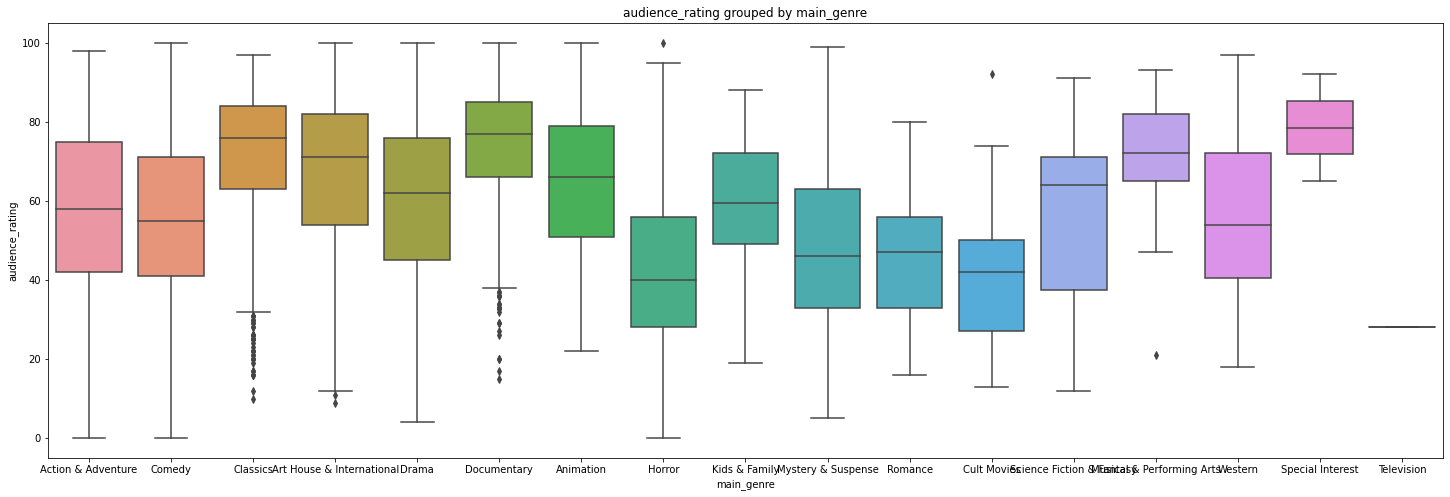

In [ ]:
create_box_plot(movies,'main_genre','audience_rating')

main_genre
Television                   36.000000
Romance                      45.230769
Horror                       46.612315
Cult Movies                  47.142857
Mystery & Suspense           47.816479
Comedy                       51.539299
Action & Adventure           54.217325
Science Fiction & Fantasy    57.918919
Kids & Family                58.977273
Drama                        59.712471
Animation                    62.946903
Western                      63.571429
Art House & International    71.642857
Musical & Performing Arts    72.166667
Classics                     79.254771
Documentary                  81.690979
Special Interest             83.333333
Name: tomatometer_rating, dtype: float64


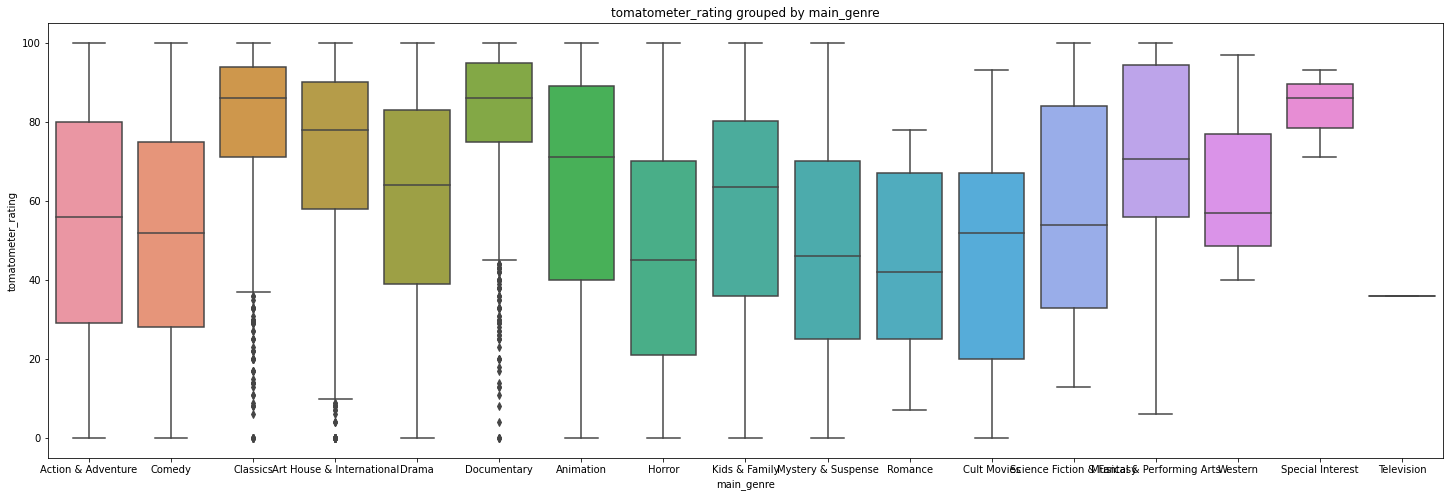

In [ ]:
create_box_plot(movies,'main_genre','tomatometer_rating')

From the box plots above, we can see that horror and Television generes have the lowest rating according to both audience_rating and tomatometer_rating. Since Television is not really a movie genere, we can conclude that horror is the least popular genere with lower ratings.

In the following anaylsis, let's see why horror movies are usually resultting in lower ratings.

# Horror Movie Analysis 

In [ ]:
horror_movies = movies[movies['main_genre']=='Horror']
horror_movies.shape

(879, 23)

In [ ]:
horror_movies.tail(4)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,main_genre
16150,m/thinner,Stephen King's 'Thinner',Billy Halleck (Robert John Burke) is an obese ...,"A bland, weightless horror film that seems to ...",R,Horror,Tom Holland,NaN,"Robert John Burke, Joe Mantegna, Lucinda Jenne...",1996-10-25,...,Rotten,15.0,20.0,Spilled,30.0,20494.0,4.0,3.0,17.0,Horror
16158,m/thirteen_ghosts,Thirteen Ghosts (13 Ghosts),A state-of-the-art remake of the classic Willi...,"The production design is first-rate, but 13 Gh...",R,Horror,Steve Beck,"Neal Marshall, Richard D'Ovidio, Steve Beck","Tony Shalhoub, Matthew Lillard, Shannon Elizab...",2001-10-23,...,Rotten,16.0,94.0,Spilled,49.0,262705.0,24.0,15.0,79.0,Horror
16230,m/thriller_2018,Thriller,Years after a childhood prank goes horribly wr...,Thriller has an appealing cast and a fresh per...,NR,"Horror, Mystery & Suspense",Dallas Jackson,Dallas Jackson,"Chelsea Rendon, Paige Hurd, Mykelti Williamson...",NaN,...,Rotten,40.0,25.0,Spilled,15.0,34.0,6.0,10.0,15.0,Horror
16263,m/timber_falls,Timber Falls,Sheryl (Brianna Brown) and Mike (Josh Randall)...,NaN,R,"Horror, Mystery & Suspense",Tony Giglio,"Dan Kay, Tony Giglio, Daniel Kay","Josh Randall, Brianna Brown, Nick Searcy, Beth...",2007-12-07,...,Rotten,38.0,8.0,Spilled,28.0,2347.0,0.0,3.0,5.0,Horror


In [ ]:
horror_movies.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,866.000000,877.000000,877.000000,869.000000,8.680000e+02,879.000000,879.000000,879.000000
mean,94.332564,46.612315,48.068415,42.380898,8.862454e+04,9.395904,25.144482,22.828214
std,11.633032,28.198744,61.343314,18.665468,1.109366e+06,12.058618,44.808510,29.609898
min,28.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,88.000000,21.000000,10.000000,28.000000,5.145000e+02,1.000000,4.000000,5.000000
50%,92.000000,45.000000,22.000000,40.000000,4.635500e+03,4.000000,9.000000,10.000000
75%,99.000000,70.000000,64.000000,56.000000,3.274825e+04,13.000000,24.000000,27.000000
max,192.000000,100.000000,390.000000,100.000000,3.252469e+07,63.000000,380.000000,230.000000


In [ ]:
horror_movies.columns

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count',
       'main_genre'],
      dtype='object')

## **1. Missing Data**

In [ ]:
# check duplicates
horror_movies.duplicated().sum()

0

In [ ]:
# missing data

total = horror_movies.isnull().sum().sort_values(ascending=False)
percent = (horror_movies.isnull().sum()/horror_movies.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data

,Total,Percent
critics_consensus,465,0.529010
original_release_date,95,0.108077
authors,45,0.051195
production_company,43,0.048919
audience_status,27,0.030717
movie_info,14,0.015927
directors,14,0.015927
runtime,13,0.014790
streaming_release_date,12,0.013652
audience_count,11,0.012514


In [ ]:
horror_movies['original_release_date'] = 

## **2. Univariare analysis**

### 2.1 Content rating

In [ ]:
print_info(horror_movies,'content_rating')

Description:
count     879
unique      6
top         R
freq      532
Name: content_rating, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
       Count  Frequency (%)
R        532      60.523322
NR       252      28.668942
PG-13     80       9.101251
PG        13       1.478953
NC17       1       0.113766
G          1       0.113766


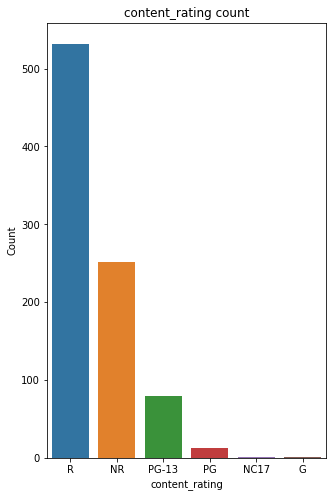

In [ ]:
create_bar_plot(horror_movies,'content_rating')

Majority of Horror movies are rated R (60.5%) or NR (28.6%)

### 2.2 Release date

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


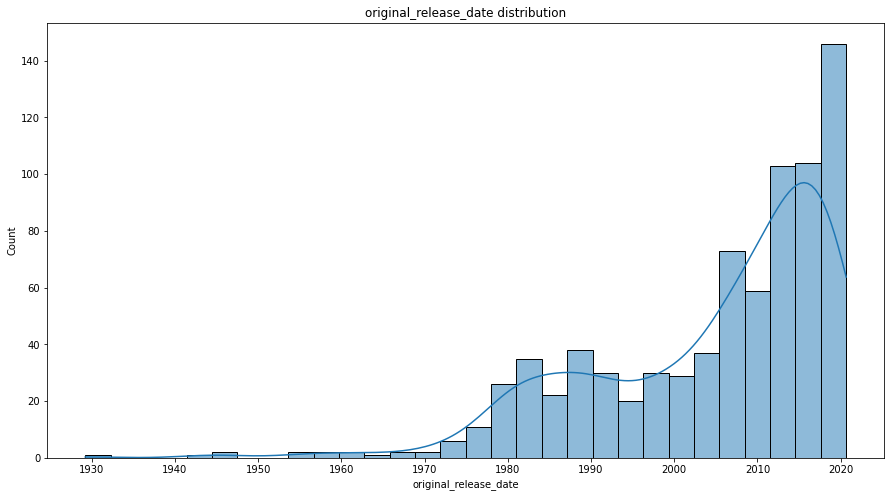

In [ ]:
create_hist_plot(horror_movies, 'original_release_date',30)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


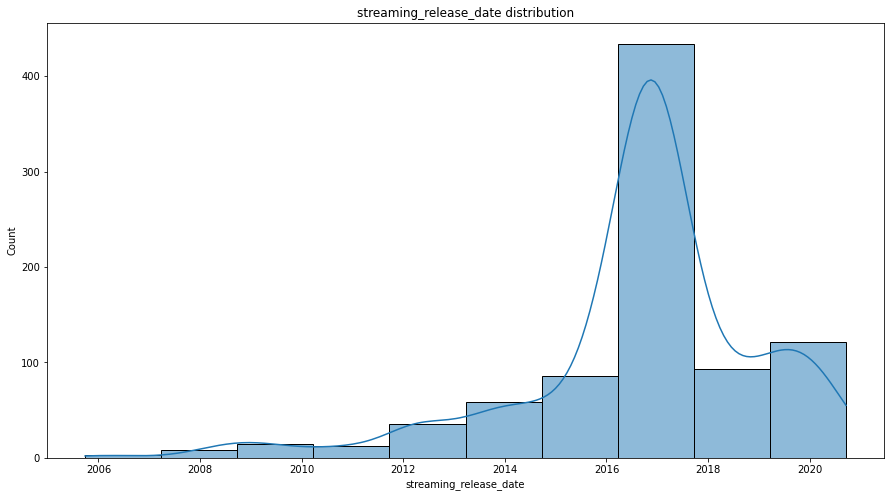

In [ ]:
create_hist_plot(horror_movies, 'streaming_release_date',10) 

### 2.3 Runtime

In [ ]:
print_info(horror_movies,'runtime')

Description:
count    866.000000
mean      94.332564
std       11.633032
min       28.000000
25%       88.000000
50%       92.000000
75%       99.000000
max      192.000000
Name: runtime, dtype: float64
**************************************************
Object type:
float64
**************************************************
Value count:
       Count  Frequency (%)
90.0      73       8.429561
95.0      47       5.427252
89.0      43       4.965358
91.0      41       4.734411
85.0      40       4.618938
...      ...            ...
121.0      1       0.115473
68.0       1       0.115473
71.0       1       0.115473
150.0      1       0.115473
124.0      1       0.115473

[67 rows x 2 columns]


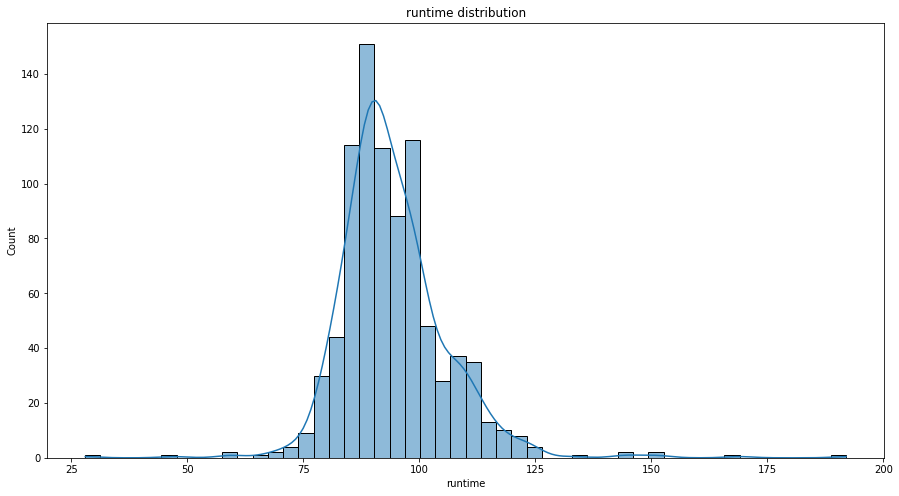

In [ ]:
create_hist_plot(horror_movies, 'runtime',50)

### 2.4 production company

In [ ]:
print_info(horror_movies,'production_company')

Description:
count                    836
unique                   340
top       Universal Pictures
freq                      29
Name: production_company, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                                  Count  Frequency (%)
Universal Pictures                   29       3.468900
IFC Films                            25       2.990431
Sony Pictures Home Entertainment     23       2.751196
Paramount Pictures                   19       2.272727
Anchor Bay Entertainment             17       2.033493
...                                 ...            ...
Random Media                          1       0.119617
Area 23a                              1       0.119617
Regent Releasing                      1       0.119617
Ghost House Pictures                  1       0.119617
Slowhand Cinema                       1       0.119617

[340 rows x 2 columns]


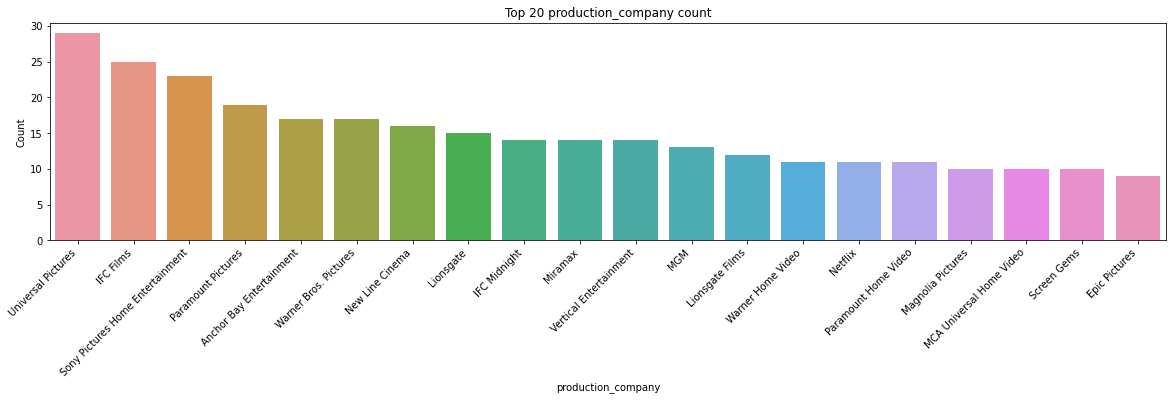

In [ ]:
top_n_bar_plot(horror_movies,'production_company',20)

### 2.5 tomatometer status

In [ ]:
print_info(horror_movies,'tomatometer_status')

Description:
count        877
unique         3
top       Rotten
freq         552
Name: tomatometer_status, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                 Count  Frequency (%)
Rotten             552      62.941847
Fresh              250      28.506271
Certified-Fresh     75       8.551881


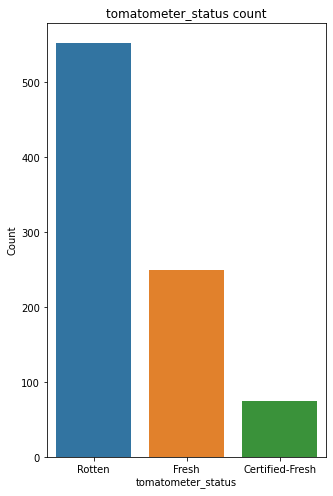

In [ ]:
create_bar_plot(horror_movies,'tomatometer_status')

### 2.6 tomatometer_rating

In [ ]:
print_info(horror_movies,'tomatometer_rating')

Description:
count    877.000000
mean      46.612315
std       28.198744
min        0.000000
25%       21.000000
50%       45.000000
75%       70.000000
max      100.000000
Name: tomatometer_rating, dtype: float64
**************************************************
Object type:
float64
**************************************************
Value count:
       Count  Frequency (%)
0.0       47       5.359179
67.0      22       2.508552
33.0      21       2.394527
100.0     21       2.394527
20.0      21       2.394527
...      ...            ...
36.0       3       0.342075
5.0        2       0.228050
61.0       2       0.228050
98.0       1       0.114025
94.0       1       0.114025

[97 rows x 2 columns]


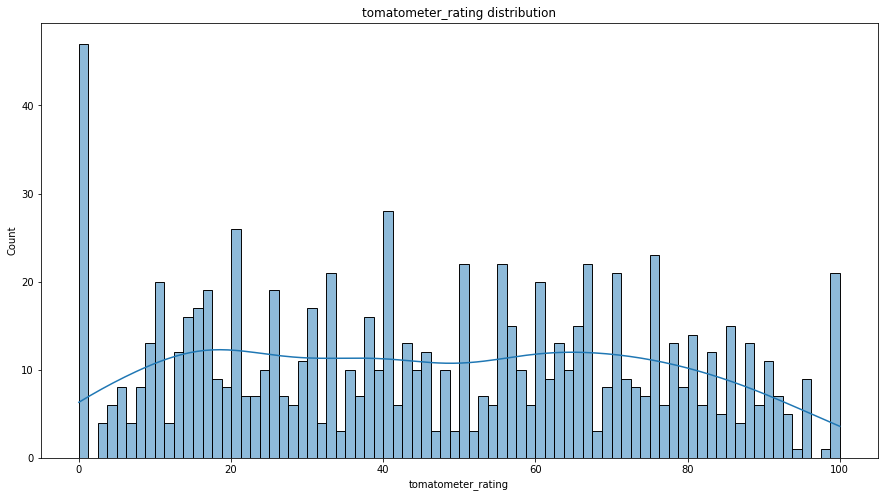

In [ ]:
create_hist_plot(horror_movies, 'tomatometer_rating',80)

### 2.7 tomatometer count

Description:
count    877.000000
mean      48.068415
std       61.343314
min        5.000000
25%       10.000000
50%       22.000000
75%       64.000000
max      390.000000
Name: tomatometer_count, dtype: float64
**************************************************
Object type:
float64
**************************************************
Value count:
       Count  Frequency (%)
5.0       50       5.701254
7.0       48       5.473204
6.0       47       5.359179
8.0       38       4.332953
9.0       35       3.990878
...      ...            ...
268.0      1       0.114025
100.0      1       0.114025
387.0      1       0.114025
145.0      1       0.114025
94.0       1       0.114025

[170 rows x 2 columns]


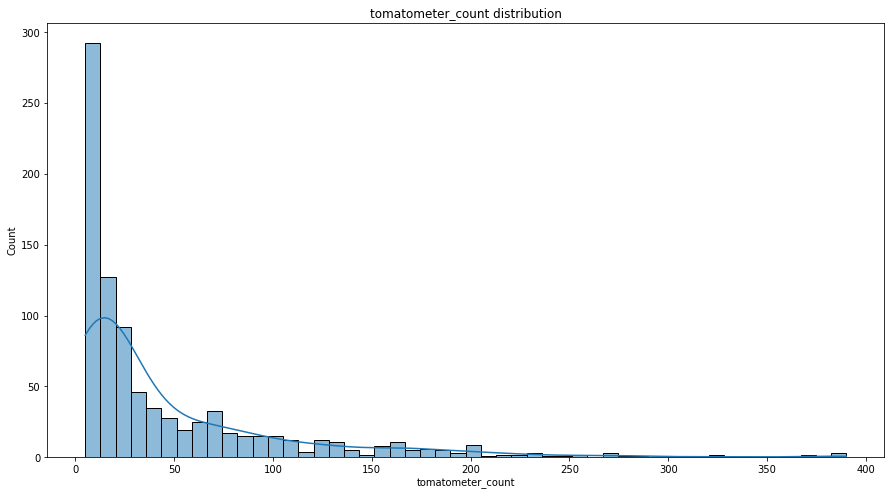

In [ ]:
print_info(horror_movies,'tomatometer_count')
create_hist_plot(horror_movies, 'tomatometer_count',50)

### 2.8 audience status

Description:
count         852
unique          2
top       Spilled
freq          700
Name: audience_status, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
         Count  Frequency (%)
Spilled    700      82.159624
Upright    152      17.840376


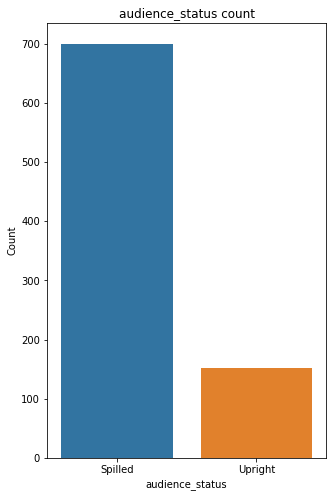

In [ ]:
print_info(horror_movies,'audience_status') 
create_bar_plot(horror_movies, 'audience_status')

### 2.9 audience rating

Description:
count    869.000000
mean      42.380898
std       18.665468
min        0.000000
25%       28.000000
50%       40.000000
75%       56.000000
max      100.000000
Name: audience_rating, dtype: float64
**************************************************
Object type:
float64
**************************************************
Value count:
      Count  Frequency (%)
33.0     27       3.107020
44.0     25       2.876870
38.0     23       2.646720
39.0     23       2.646720
30.0     21       2.416571
...     ...            ...
69.0      1       0.115075
7.0       1       0.115075
92.0      1       0.115075
95.0      1       0.115075
11.0      1       0.115075

[87 rows x 2 columns]


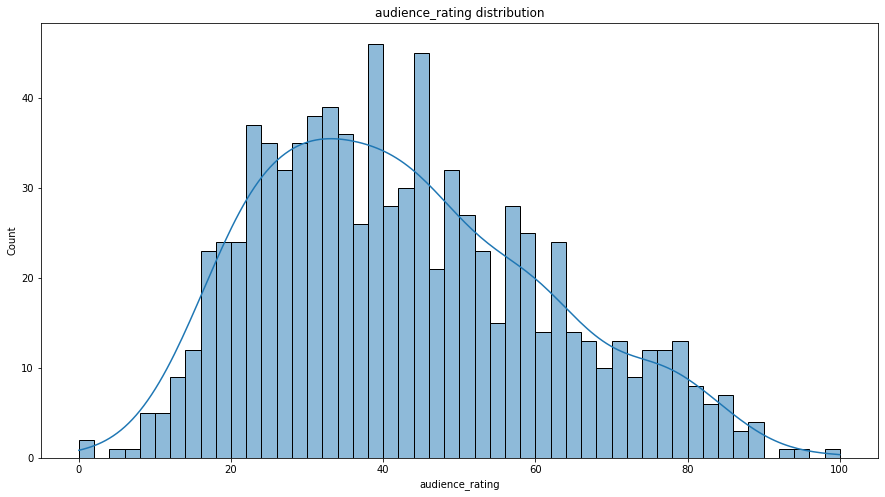

In [ ]:
print_info(horror_movies,'audience_rating') 
create_hist_plot(horror_movies, 'audience_rating',50)

### 2.10 tomatometer top, fresh, and rotten critics_count

Description:
count    879.000000
mean       9.395904
std       12.058618
min        0.000000
25%        1.000000
50%        4.000000
75%       13.000000
max       63.000000
Name: tomatometer_top_critics_count, dtype: float64
**************************************************
Object type:
float64
**************************************************
Value count:
      Count  Frequency (%)
0.0     163      18.543800
1.0      97      11.035267
2.0      78       8.873720
4.0      56       6.370876
3.0      56       6.370876
5.0      55       6.257110
6.0      36       4.095563
7.0      28       3.185438
8.0      25       2.844141
10.0     19       2.161547
11.0     16       1.820250
20.0     15       1.706485
13.0     15       1.706485
18.0     14       1.592719
14.0     13       1.478953
9.0      12       1.365188
29.0     11       1.251422
21.0     11       1.251422
19.0     11       1.251422
15.0     10       1.137656
17.0      9       1.023891
23.0      8       0.910125
32.0      8       

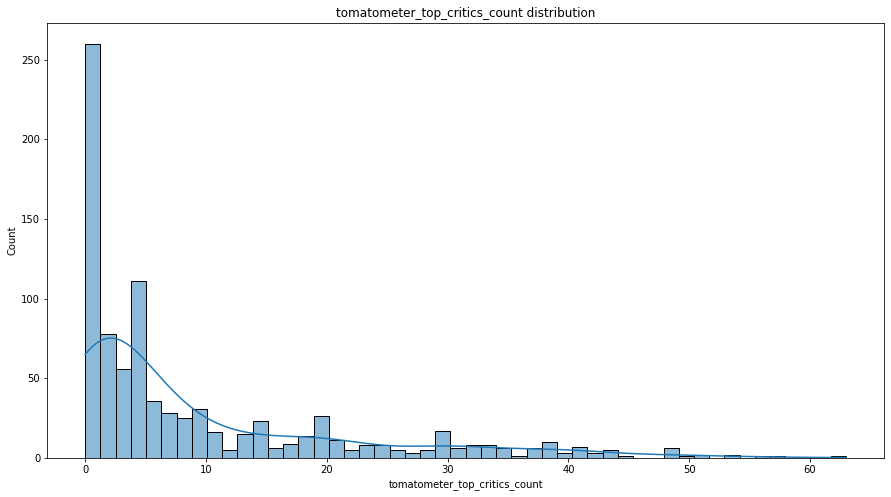

In [ ]:
print_info(horror_movies,'tomatometer_top_critics_count')
create_hist_plot(horror_movies,'tomatometer_top_critics_count',50)

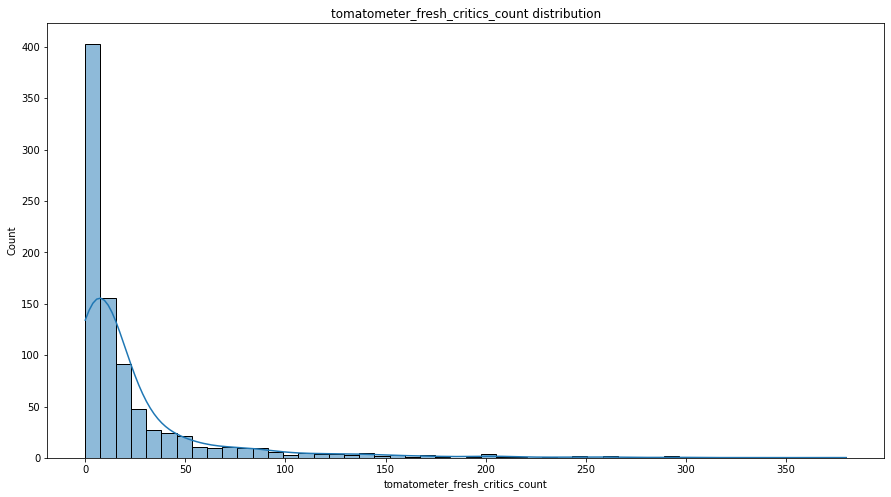

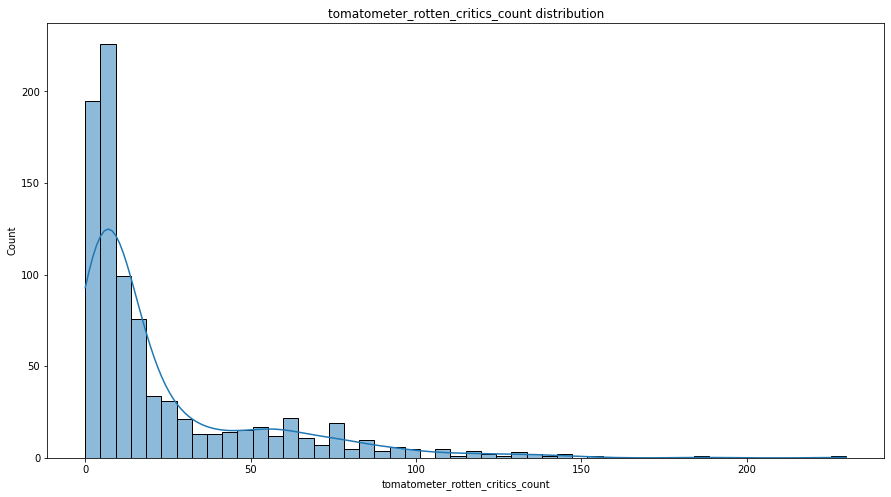

In [ ]:
create_hist_plot(horror_movies,'tomatometer_fresh_critics_count',50) 
create_hist_plot(horror_movies,'tomatometer_rotten_critics_count',50)  

### 2.11 directors, actors and authors

In [ ]:
print_info(horror_movies,'directors')

Description:
count                865
unique               698
top       John Carpenter
freq                   9
Name: directors, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                     Count  Frequency (%)
John Carpenter           9       1.040462
Wes Craven               7       0.809249
Rob Zombie               7       0.809249
Darren Lynn Bousman      6       0.693642
George A. Romero         6       0.693642
...                    ...            ...
Jody Dwyer               1       0.115607
Chad Ferrin              1       0.115607
James Watkins            1       0.115607
Ryan Andrews             1       0.115607
Dallas Jackson           1       0.115607

[698 rows x 2 columns]


In [ ]:
print_info(horror_movies,'actors') 

Description:
count                                                   877
unique                                                  877
top       Samantha Dark, R. Brandon Johnson, Heather Mag...
freq                                                      1
Name: actors, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                                                    Count  Frequency (%)
Samantha Dark, R. Brandon Johnson, Heather Mage...      1       0.114025
Edward Furlong, Anthony Edwards, Clancy Brown, ...      1       0.114025
Katie Featherston, Micah Sloat, Mark Fredrichs,...      1       0.114025
Katie Featherston, Micah Sloat, Brian Boland, M...      1       0.114025
Jessica Tyler Brown, Chloe Csengery, Christophe...      1       0.114025
...                                                   ...            ...
Dan Grimaldi, Robert Osth, Ruth Dardick, Charli...      1       0.114025


In [ ]:
print_info(horror_movies,'authors') 

Description:
count            834
unique           751
top       Rob Zombie
freq               6
Name: authors, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                                                    Count  Frequency (%)
Rob Zombie                                              6       0.719424
Marcus Dunstan, Patrick Melton                          5       0.599520
Leigh Whannell                                          5       0.599520
Don Mancini                                             4       0.479616
Don Coscarelli                                          4       0.479616
...                                                   ...            ...
Mark Huckerby, Nick Ostler, Nick Ostler, Mark H...      1       0.119904
Rick Bieber                                             1       0.119904
Tony Giglio                                             1       0.119904
Manny Cot

## **3.Bivariate analysis**


### 3.1 Numerical vs Numerical

In [ ]:
horror_movies.select_dtypes(include=np.number).columns

Index(['runtime', 'tomatometer_rating', 'tomatometer_count', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'],
      dtype='object')

#### 3.1.1 Pair plot 

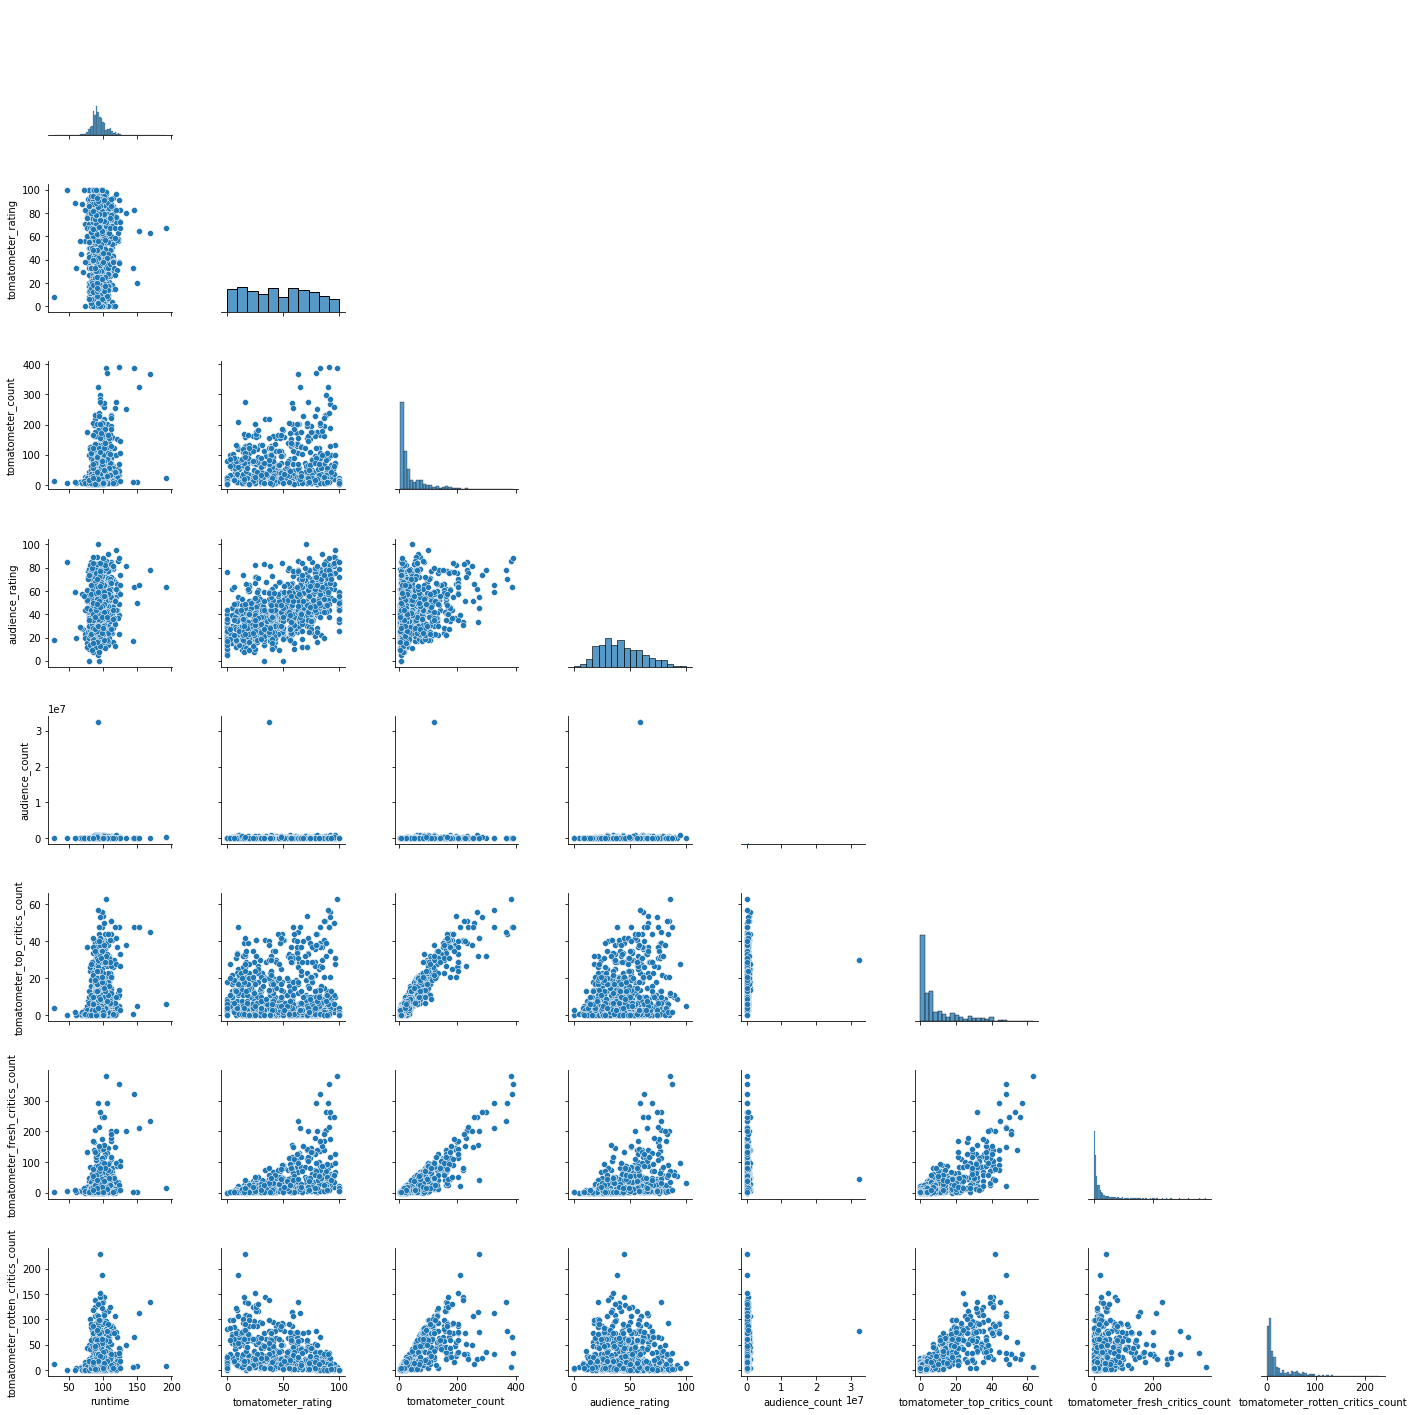

In [ ]:
sns.pairplot(horror_movies.select_dtypes(include=np.number),corner=True)
plt.show()

#### 3.1.2 tomatometer_rating vs audience_rating

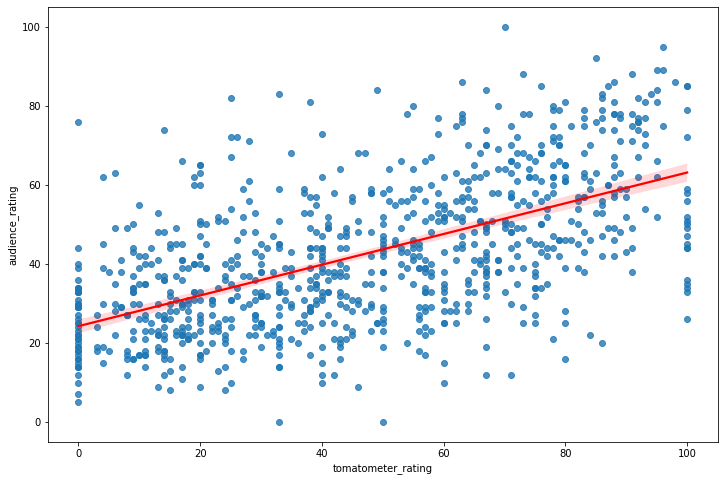

In [ ]:
# one numerical vs one numerical - Scatter plots
fig, ax = plt.subplots(figsize=(12,8))
sns.regplot(x='tomatometer_rating',y='audience_rating',data=horror_movies,line_kws={'color': 'red'})
plt.show()

#### 3.1.3 tomatometer_count vs tomatometer_top_critics_count

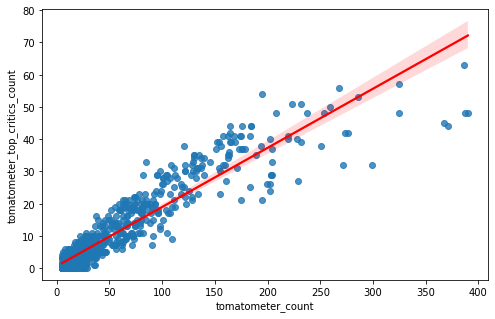

In [ ]:
# one numerical vs one numerical - Scatter plots
fig, ax = plt.subplots(figsize=(8,5))
sns.regplot(x='tomatometer_count',y='tomatometer_top_critics_count',data=horror_movies,line_kws={'color': 'red'})
plt.show()

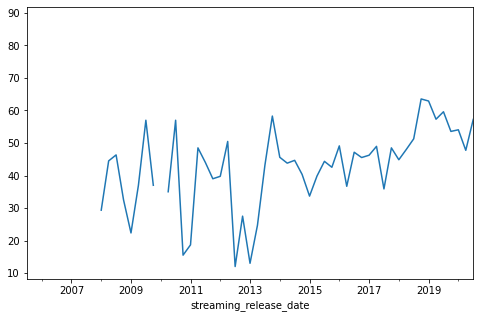

In [ ]:
d = horror_movies.groupby(pd.Grouper(key='streaming_release_date', freq='Q')).mean()['tomatometer_rating']
fig, ax = plt.subplots(figsize=(8,5))
d.plot(use_index=True)

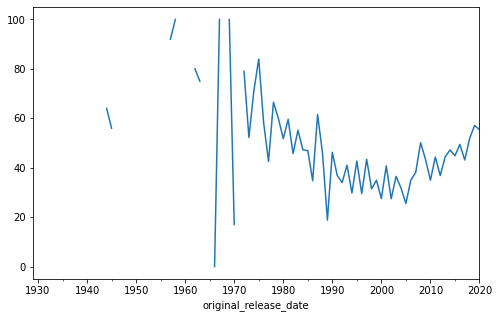

In [ ]:
d = horror_movies.groupby(pd.Grouper(key='original_release_date', freq='Y')).mean()['tomatometer_rating']
fig, ax = plt.subplots(figsize=(8,5))
d.plot(use_index=True)

#### 3.1.4 corrlation analysis

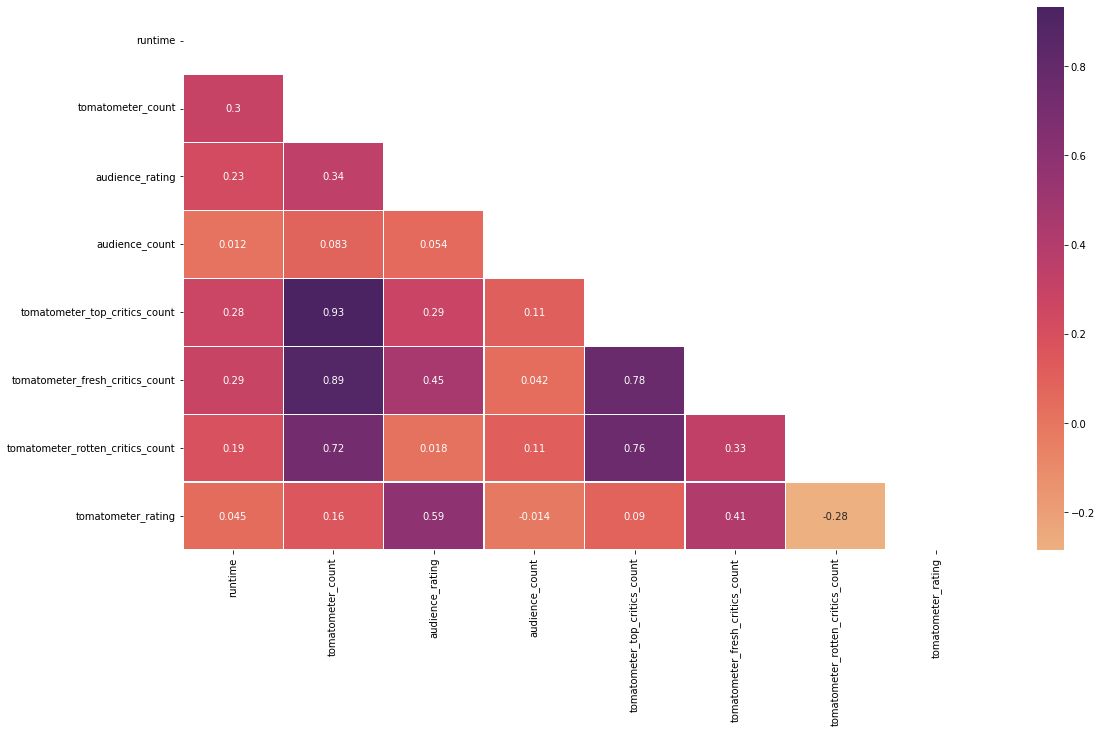

In [ ]:
# correlation analysis with heatmap  - target column is int 
df = pd.concat([horror_movies.drop('tomatometer_rating',axis=1),horror_movies.tomatometer_rating],axis=1).corr()
# Get the lower triangle of the correlation matrix
# Generate a mask for the upper triangle
mask = np.zeros_like(df, dtype='bool')
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(18,10))
# seaborn heatmap
sns.heatmap(df, annot=True, cmap='flare',mask=mask, linewidths=.5)
# plot the heatmap
plt.show()

- audience rating and tomatometer fresh count that are correlated with target feature
- tomatometer top/fresh/rotten critices count are highly correlated with tomatometer count since majority of the tomatometer status are Rotten and Fresh.
Thus, we should consider only keeping one feature among them.


### 3.2 Numerical vs Categorical (ANOVA)

In [ ]:
horror_movies.select_dtypes(include=object).columns

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'streaming_release_date', 'production_company',
       'tomatometer_status', 'audience_status', 'main_genre'],
      dtype='object')

#### 3.2.1 tomatometer rating vs. all categorical features

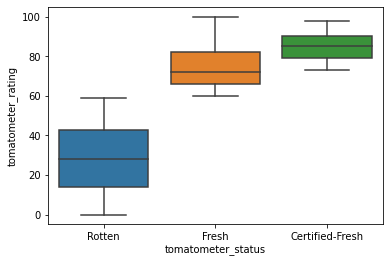

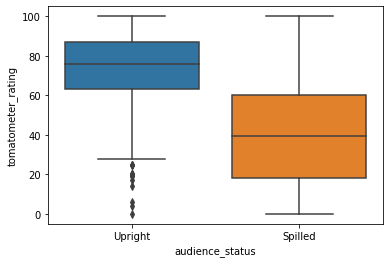

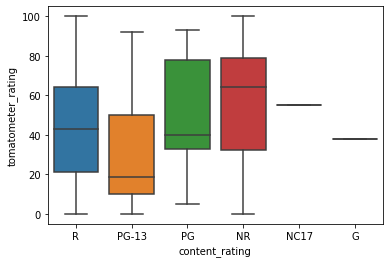

In [ ]:
cat_features = ['tomatometer_status', 'audience_status', 'content_rating']
for i in range(len(cat_features)):
  sns.boxplot(x = horror_movies[cat_features[i]], y = horror_movies['tomatometer_rating'])
  ax.set_title(cat_features[i]+'vs tomatometer_rating')
  plt.ylabel('tomatometer_rating')
  plt.show()

#### 3.2.2 runtime vs categorical features

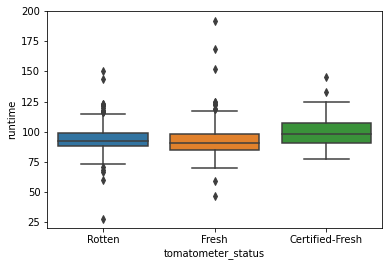

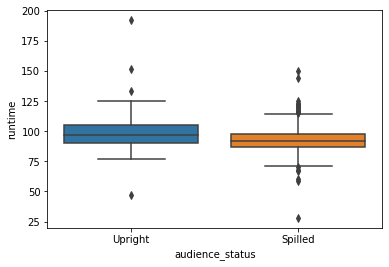

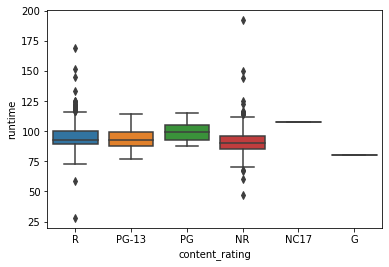

In [ ]:
for i in range(len(cat_features)):
  sns.boxplot(x = horror_movies[cat_features[i]], y = horror_movies['runtime'])
  ax.set_title(cat_features[i]+'vs runtime')
  plt.ylabel('runtime')
  plt.show()

#### 3.2.3 production_company vs rating

In [ ]:
company_groupby = horror_movies.groupby('production_company').tomatometer_rating.agg(['mean','count'])
a = company_groupby.sort_values('count',ascending=False).head(20)
a

,mean,count
production_company,,
Universal Pictures,53.241379,29
IFC Films,43.880000,25
Sony Pictures Home Entertainment,40.173913,23
Paramount Pictures,47.000000,19
Warner Bros. Pictures,36.411765,17
Anchor Bay Entertainment,38.470588,17
New Line Cinema,45.812500,16
Lionsgate,38.533333,15
Miramax,19.857143,14


In [ ]:
print_info(company_groupby,'mean')

Description:
count    340.000000
mean      48.469890
std       26.084861
min        0.000000
25%       27.928571
50%       47.090909
75%       69.000000
max      100.000000
Name: mean, dtype: float64
**************************************************
Object type:
float64
**************************************************
Value count:
            Count  Frequency (%)
0.000000       14       4.117647
100.000000      9       2.647059
38.000000       8       2.352941
50.000000       7       2.058824
71.000000       7       2.058824
...           ...            ...
67.571429       1       0.294118
43.880000       1       0.294118
74.000000       1       0.294118
53.500000       1       0.294118
74.333333       1       0.294118

[159 rows x 2 columns]


In [ ]:
print(company_groupby[company_groupby['mean']==0])
print(company_groupby[company_groupby['mean']==0].shape)

                           mean  count
production_company                    
Animus Films                0.0      1
Black & Blue                0.0      1
Continental Home Video      0.0      1
First Look Pictures         0.0      1
ITC Entertainment           0.0      1
Magnolia Releasing          0.0      1
Pelican Point Media         0.0      1
Relativity Studios          0.0      1
Saban Films and Lionsgate   0.0      1
Sinister Cinema             0.0      1
Vestron Pictures Ltd.       0.0      1
Weinstein Company           0.0      1
Willing Suspension Films    0.0      1
Wrekin Hill                 0.0      1
(14, 2)


In [ ]:
print(company_groupby[company_groupby['mean']==100])
print(company_groupby[company_groupby['mean']==100].shape)

                         mean  count
production_company                  
Aphasia Films           100.0      1
Dark Elegy Films        100.0      1
Eclectic Pictures       100.0      1
Energize Students       100.0      1
Global                  100.0      1
HPLHS Motion Pictures   100.0      1
House Lights Media      100.0      1
Level 33 Entertainment  100.0      1
Schattenkante           100.0      1
(9, 2)


In [ ]:
print(company_groupby[(company_groupby['mean']>69) & (company_groupby['count']>1)].sort_values('mean',ascending=False))
print(company_groupby[(company_groupby['mean']>69) & (company_groupby['count']>1)].shape)

                                   mean  count
production_company                            
A24 Films                     90.500000      2
Fox Searchlight Pictures      87.500000      2
A24                           83.000000      2
Revolver Entertainment        82.000000      2
Drafthouse Films              81.000000      2
Dark Sky Films                79.571429      7
Shudder                       79.000000      4
Universal 1440 Entertainment  77.000000      2
Magnet Releasing              76.500000      4
The Orchard                   76.333333      3
The Horror Collective         74.500000      2
Well Go USA Entertainment     74.333333      3
Glass Eye Pix                 72.500000      2
Epic Pictures                 71.625000      8
(14, 2)


In [ ]:
company_groupby[company_groupby.index.str.contains('24')].agg({'mean': 'mean', 'count': 'sum'})

mean     81.833333
count     5.000000
dtype: float64

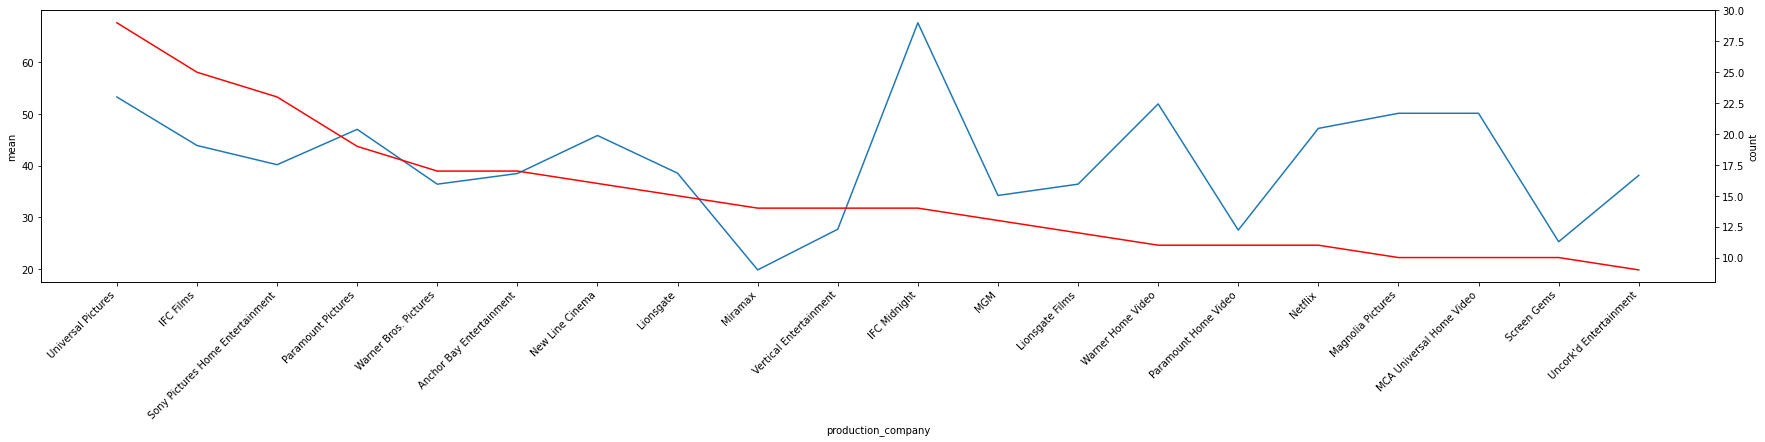

In [ ]:
fig, ax = plt.subplots(figsize=(30,5))
sns.lineplot(y='mean', x=a.index ,data=a, ax=ax)
ax2 = ax.twinx()
sns.lineplot(y='count', x=a.index ,data=a, ax=ax2,color='r')
ax.set_xticklabels(a.index,rotation=45,ha='right')
plt.show()

### 3.2.4 directors vs rating 

In [ ]:
directors_groupby = horror_movies.groupby('directors').tomatometer_rating.agg(['mean','count'])
b = directors_groupby.sort_values('count',ascending=False).head(20)
b

,mean,count
directors,,
John Carpenter,60.333333,9
Wes Craven,54.142857,7
Rob Zombie,38.714286,7
George A. Romero,59.500000,6
Darren Lynn Bousman,33.833333,6
James Wan,56.666667,6
Tobe Hooper,49.600000,5
Anthony DiBlasi,64.500000,4
Don Coscarelli,44.250000,4


In [ ]:
sad_dictors = directors_groupby[directors_groupby['mean']==0]
print(sad_dictors)
print(directors_groupby[directors_groupby['mean']==0].shape)

                                                    mean  count
directors                                                      
Albert Band                                          0.0      1
D.J. Caruso                                          0.0      1
Dario Piana                                          0.0      1
David Blyth, Jim Isaac, James Isaac                  0.0      1
Denis Rovira                                         0.0      1
Donald P. Borchers                                   0.0      1
Eric Valette                                         0.0      1
Ethan Wiley                                          0.0      1
George Dugdale, Mark Ezra, Peter Litten              0.0      1
Gregg Hale, Liam O'Donnell, Eduardo Sánchez, Ti...   0.0      1
Hal P. Warren                                        0.0      1
Jason Wulfsohn                                       0.0      1
Jeff Burr, Joseph Ruben                              0.0      1
Jeffrey S. Delman                       

In [ ]:
sad_dictors

In [ ]:
directors_company_groupby=horror_movies.groupby(['directors','production_company']).tomatometer_rating.agg(['mean','count']).reset_index(inplace=False)
directors_company_groupby[directors_company_groupby['mean']==0].groupby('production_company').directors.count().sort_values(ascending=False)

production_company
Anchor Bay Entertainment            2
Miramax                             2
Warner Home Video                   2
WARNER BROTHERS PICTURES            2
Vertical Entertainment              2
Trimark                             2
Sinister Cinema                     1
Pelican Point Media                 1
Relativity Studios                  1
Saban Films and Lionsgate           1
Screen Media Films                  1
Anchor Bay                          1
Sony Pictures Home Entertainment    1
New Films International             1
Vestron Pictures Ltd.               1
Warner Bros. Pictures               1
Weinstein Company                   1
Willing Suspension Films            1
United Artists                      1
Netflix                             1
Millennium Entertainment            1
Magnolia Releasing                  1
MGM                                 1
Lorimar Productions                 1
Lionsgate Films                     1
Lionsgate                      

## **4.Question time!**


Check out blog post for more fun insights!